# Creating plots of solution of Uncertain volatility model with 2D Tree-Grid method

- Implementation of 2D Tree-Grid method with boundary conditions possibly dependent on t (time) and but constant in spacedirection tangent to boundary. To compute boundary condition data from previous boundary condition can be used Domain has to be rectangular. Problem coefficients have to be time-independent.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import TreeGrid_module as TG
import matplotlib.gridspec as gridspec

### Pricing the butterfly spread on maximum of two assets under uncertain volatility model with the 2D Tree-Grid method 
- computing the results:

In [2]:
# creating rough grid:
X1=np.arange(0,144+8,8)
X2=np.arange(0,80+4,4)
X3=np.arange(30,50+2,2)
X=np.sort(np.unique(np.concatenate((X1,X2,X3))))
T=np.arange(0,0.25+0.01,0.01)
# refining grid:
no_refinements=1
for k in range(no_refinements):
    XX=(X[1:X.shape[0]]+X[0:X.shape[0]-1])/2
    X=np.sort(np.unique(np.concatenate((X,XX))))
    TT=(T[1:T.shape[0]]+T[0:T.shape[0]-1])/2
    T=np.sort(np.unique(np.concatenate((T,TT))))
    NCon=1+2**(no_refinements+1)
# defining Y grid (as a copy of X-grid): 
Y=np.array(X)

# creting model and boundary objects for the 2D problem and for the 1D problems on the left and lower boundary 
maxmodel=TG.SCP_uncertain_volatility_2D(no_controls_x=NCon,no_controls_y=NCon)
maxmodel_for_BC=TG.SCP_uncertain_volatility()
minmodel=TG.SCP_uncertain_volatility_2D(extrem='min',no_controls_x=NCon,no_controls_y=NCon)
minmodel_for_BC=TG.SCP_uncertain_volatility(extrem='min')
TCBC=TG.TCBC_butterfly_2D()
TCBC_for_BC=TG.TCBC_butterfly()

# searching worst case scenario price (HJB with maximization):
#    -solving 1D problems on the left and lower boundary:
solution_down=TG.TreeGridFull(X,T,maxmodel_for_BC,TCBC_for_BC)
solution_left=TG.TreeGridFull(Y,T,maxmodel_for_BC,TCBC_for_BC)
#    -saving solutions of 1D problems as argument for boundary conditions for 2D problem 
BC_args=[solution_down,solution_left]
#    -solving the original 2D problem:
Vmax, Flags=TG.TreeGrid2D(X,Y,T,maxmodel,TCBC,BC_args,1/400)

# searching best case scenario price (HJB with minimization) (in the same way):
solution_down=TG.TreeGridFull(X,T,minmodel_for_BC,TCBC_for_BC)
solution_left=TG.TreeGridFull(Y,T,minmodel_for_BC,TCBC_for_BC)
BC_args=[solution_down,solution_left]
Vmin, Flags=TG.TreeGrid2D(X,Y,T,minmodel,TCBC,BC_args,1/400)

# creating meshgrid for identification of the solution in a particular point:
Yy, Xx = np.meshgrid(Y, X)
#prinitng solution for X=40$, Y=40$
print('Butterfly spread price for X=40$, Y=40$ is worth in best case',Vmin[(Xx==40)*(Yy==40)][0],'$ and in worst case',\
      Vmax[(Xx==40)*(Yy==40)][0],'$.')

Butterfly spread price for X=40$, Y=40$ is worth in best case 0.947459984962 $ and in worst case 2.66186592401 $.


- $M$ (number of time layers), $N_x$, $N_y$ (space discretization), and $Q$ (number of controls)

In [3]:
 T.shape, X.shape, Y.shape, maxmodel.controls.shape

((51,), (69,), (69,), (32, 3))

- plotting terminal condition (butterfly payoff diagram) and the option price with respect to asset prices: worst and best case scenarios:

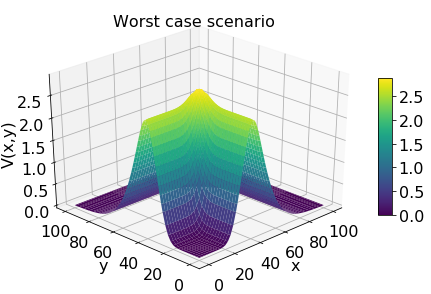

In [4]:
Vmaxm=Vmax[0:np.sum(X<=100),0:np.sum(Y<=100)]
Vminm=Vmin[0:np.sum(X<=100),0:np.sum(Y<=100)]
V0=TCBC.TC(X,Y)
V0m=V0[0:np.sum(X<=100),0:np.sum(Y<=100)]
# creating meshgrid
Ym, Xm = np.meshgrid(Y[Y<=100], X[X<=100])

fig1 = plt.figure()
figsz=fig1.get_size_inches() # returns size of figure
fig1.set_size_inches(1*figsz[0],1*figsz[1]) 
#fig1.set_size_inches(1*figsz[0],1*figsz[0]) 

plt.subplots_adjust(left=0.025, bottom=0.05, right=1.025, top=1.00, wspace=0, hspace=0)
plt.rc('font', size=16)
plt.rc('axes', titlesize=16) 

pl1 = fig1.add_subplot(1,1,1,projection='3d')
surf = pl1.plot_surface(Xm, Ym, Vmaxm, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
fig1.colorbar(surf,shrink=0.5, aspect=10, pad=0)
pl1.set_xlabel('x')
pl1.set_ylabel('y')
pl1.zaxis.set_rotate_label(False)  # disable automatic rotation
pl1.set_zlabel('V(x,y)', rotation=90)
pl1.set_title('Worst case scenario')
elv, azm = pl1.elev, pl1.azim
pl1.view_init(elev=elv,azim=azm+285)

plt.savefig('uncvol1.pdf')
plt.show()

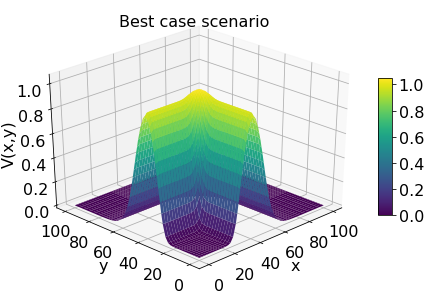

In [5]:
fig1 = plt.figure()
figsz=fig1.get_size_inches() # returns size of figure
fig1.set_size_inches(1*figsz[0],1*figsz[1]) 
#fig1.set_size_inches(1*figsz[0],1*figsz[0]) 

plt.subplots_adjust(left=0.025, bottom=0.05, right=1.025, top=1.00, wspace=0, hspace=0)
plt.rc('font', size=16)
plt.rc('axes', titlesize=16) 

pl1 = fig1.add_subplot(1,1,1,projection='3d')
surf = pl1.plot_surface(Xm, Ym, Vminm, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
fig1.colorbar(surf,shrink=0.5, aspect=10, pad=0)
pl1.set_xlabel('x')
pl1.set_ylabel('y')
pl1.zaxis.set_rotate_label(False)  # disable automatic rotation
pl1.set_zlabel('V(x,y)', rotation=90)
pl1.set_title('Best case scenario')
elv, azm = pl1.elev, pl1.azim
pl1.view_init(elev=elv,azim=azm+285)

plt.savefig('uncvol2.pdf')
plt.show()